In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [110]:
data = pd.read_csv('dados_rpm_10hz.csv')

In [111]:
resposta = data['rpm']

In [112]:
freq_de_corte = 0.1 # Ajuste conforme necessário
ordem = 2

# Obter os coeficientes do filtro Butterworth
b, a = butter(ordem, freq_de_corte, btype='low', analog=False)

# Aplicar o filtro aos dados
resposta_filtrada = filtfilt(b, a, resposta)
resposta_filtrada = pd.DataFrame(resposta_filtrada)
resposta_filtrada.head()

,0
0,552.615698
1,637.690376
2,724.371980
3,814.276209
4,908.636755


In [113]:
# Frequência de amostragem (baudrate)
sampling_freq = 115200.0

# Calcula o tempo de coleta de cada amostra
tempo_de_coleta = np.array(pd.read_csv('tempo_de_coleta_10hz.csv'))
print(tempo_de_coleta)

[[0.00000000e+00]
 [8.68055556e-06]
 [1.73611111e-05]
 ...
 [9.52256944e-03]
 [9.53125000e-03]
 [9.53993056e-03]]


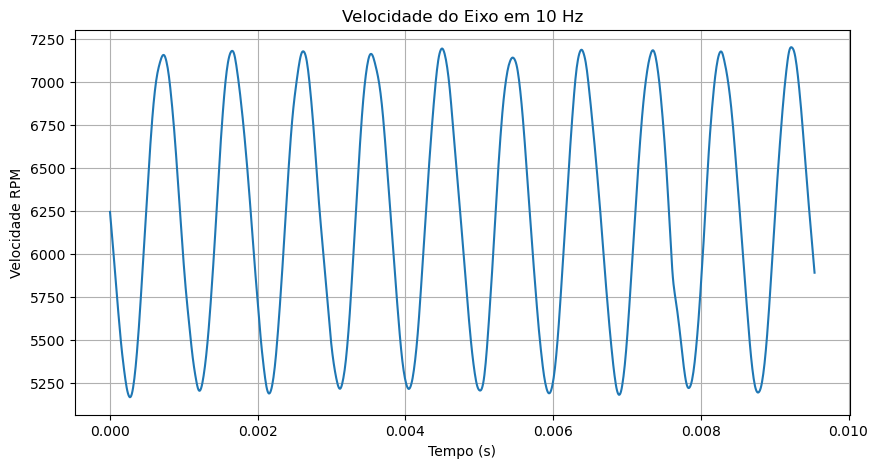

In [114]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(tempo_de_coleta, resposta_filtrada.iloc[300:1400])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 10 Hz')
plt.grid()
plt.show()